# 1. **Regression**

Regression, or regression analysis, is a statistical technique for estimating the relationships among variables. It is used to model the relationship between a `dependent variable` and one or more `independent variables`. The goal of regression analysis is to understand how the value of the dependent variable changes as the values of the independent variables shift.

For example we can analyze the relationship between the height (x) of a person against the weight (y) of a person and come up with a model that predicts one from the other. Finding that function where `y = f(x)` is called regression.

If we assume that relationship between x and y is linear we're dealing with `linear regression`.

# 2. **Linear regression**

Additional information,
- Gradients [*](https://www.youtube.com/watch?v=zVSq5b3PPfY)
- Derivatives [*](https://www.youtube.com/watch?v=N2PpRnFqnqY) [*](https://www.youtube.com/watch?v=9vKqVkMQHKk) [*](https://www.youtube.com/watch?v=S0_qX4VJhMQ)

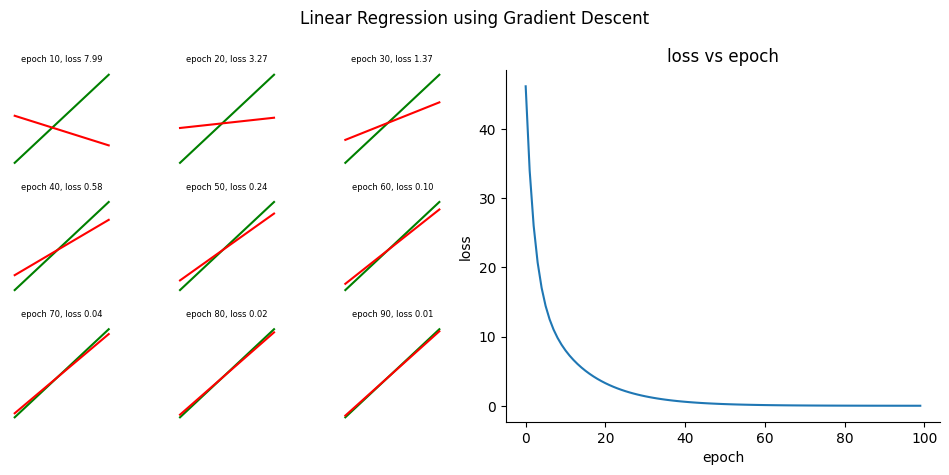

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# Create variables: x = independant, y = dependant
x = np.linspace(1, -0.5, 10)
y = np.linspace(0, 2, 10)

# Create weights: a = y-intercept, b = slope
a = np.random.randn()
b = np.random.randn()

epochs = 100
learning_rate = 0.01
losses = []

plot = -1
fig, axes = plt.subplot_mosaic("012xxx;345xxx;678xxx", tight_layout=True, figsize=(9.6, 4.8))
fig.suptitle('Linear Regression using Gradient Descent')

for i in range(epochs):

    # Make a new prediction using the weights a and b
    y_pred = a + b * x

    # Compute how far the prediction is off from the target (y)
    # using mean squared error loss function which does the following
    #  1. Prediction is subtracted from the target eg. [1,2,3] - [4,5,6] = [-3,-3,-3]
    #  2. The result is squared eg. [-3,-3,-3] ^ 2 = [9,9,9]
    #  3. The values are summed eg. sum([9,9,9]) = 27
    # The loss is 27
    loss = np.square(y_pred - y).sum()
    losses.append(loss)

    # Backprop to compute gradients of a, b with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b

    if i % (epochs/10) == 0 and i > 0:

        plot += 1

        axes[f'{plot}'].set_title(f'epoch {i}, loss {loss:0.2f}', fontsize=6)
        axes[f'{plot}'].axis('off')
        axes[f'{plot}'].plot(y, color="green")
        axes[f'{plot}'].plot(y_pred, color="red")

axes['x'].set_title('loss vs epoch')
axes['x'].set_xlabel('epoch')
axes['x'].set_ylabel('loss')

axes['x'].spines['top'].set_visible(False)
axes['x'].spines['right'].set_visible(False)

axes['x'].plot(range(epochs), losses)

# 3. **Linear Regression in Pytorch**

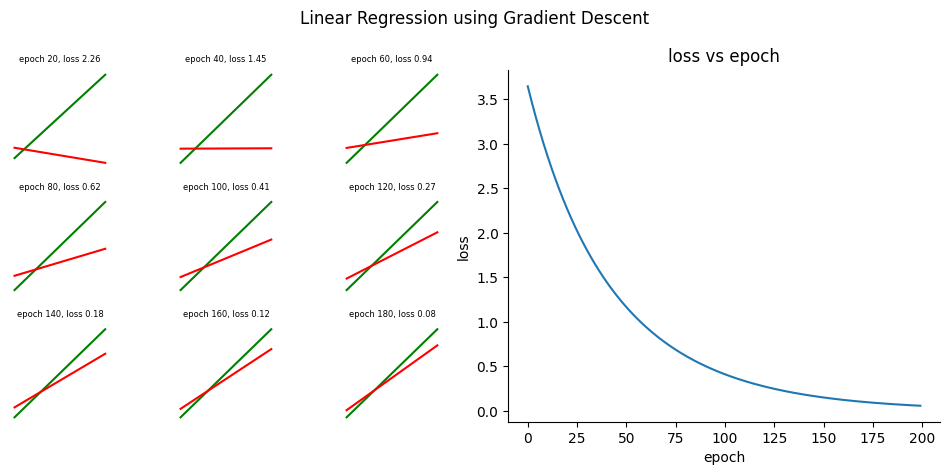

In [2]:
import torch
from torch import nn

epochs = 200

torch.manual_seed(1)

# One input, one output
model = nn.Linear(in_features=1, out_features=1)

# Stochastic Gradient Descent Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

x = torch.tensor([[1.0], [-0.5]])
y = torch.tensor([[0.0], [2.0]])

# Mean Squared Error loss function
lossfn = nn.MSELoss()
losses = []

plot = -1
fig, axes = plt.subplot_mosaic("012xxx;345xxx;678xxx", tight_layout=True, figsize=(9.6, 4.8))
fig.suptitle('Linear Regression using Gradient Descent')

for i in range(epochs):
    y_pred = model.forward(x)
    loss = lossfn(y_pred, y)
    losses.append(loss.detach().numpy())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % (epochs/10) == 0 and i > 0:

        plot += 1

        axes[f'{plot}'].set_title(f'epoch {i}, loss {loss:0.2f}', fontsize=6)
        axes[f'{plot}'].axis('off')
        axes[f'{plot}'].plot(y, color="green")
        axes[f'{plot}'].plot(y_pred.detach().numpy(), color="red")

axes['x'].set_title('loss vs epoch')
axes['x'].set_xlabel('epoch')
axes['x'].set_ylabel('loss')

axes['x'].spines['top'].set_visible(False)
axes['x'].spines['right'].set_visible(False)

axes['x'].plot(range(epochs), losses)

# 4. Generating dataset

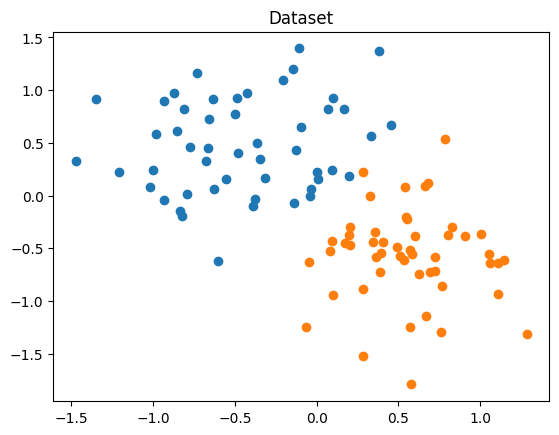

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Seed of number generator so get the same random data everytime
state = 123

# Amount of points we are aiming for
samples = 100

# Center coordinates for each point cloud
centers = [[-0.5, 0.5], [0.5, -0.5]]

# Generate dataset
xy, label = datasets.make_blobs(n_samples=samples, random_state=state, centers=centers, cluster_std=0.4)

# Visualize dataset
plt.title('Dataset')
plt.scatter(xy[label==0, 0], xy[label==0, 1])
plt.scatter(xy[label==1, 0], xy[label==1, 1])

input = torch.Tensor(xy)
output = torch.Tensor(label.reshape(100, 1))

# 5. Creating a model

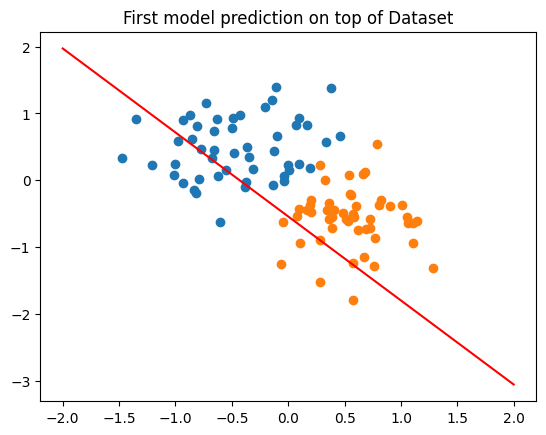

In [8]:
import torch.nn as nn

class Model(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        y = self.linear(x)
    # Use sigmoid activation function which maps y to a value between 0 and 1
        pred = torch.sigmoid(y)
        return pred

    def predict(self, x):
      return 1 if self.forward(x) > 0.5 else 0

  # Method returns current model weights and bias
    def wanb(self):
        [weights, bias] = model.parameters()
        w1, w2 = weights.view(2)
        b1 = bias[0]
        return w1.item(), w2.item(), b1.item()

# Seed of number generator so get the same random data everytime
torch.manual_seed(3)

# Instance the model with 2 inputs and 1 output
model = Model(2, 1)

# Get the current weights and bias
w1, w2, b1 = model.wanb()

# Create two x inputs
x = np.array([-2.0, 2.0])

# Get two y outputs according to the current model's weights and bias
y = (w1 * x + b1) / -w2

# Visualize the untrained model prediction on top of the dataset
plt.title('First model prediction on top of Dataset')
plt.plot(x, y, 'r')
plt.scatter(xy[label==0, 0], xy[label==0, 1])
plt.scatter(xy[label==1, 0], xy[label==1, 1])

# 6. Training the model

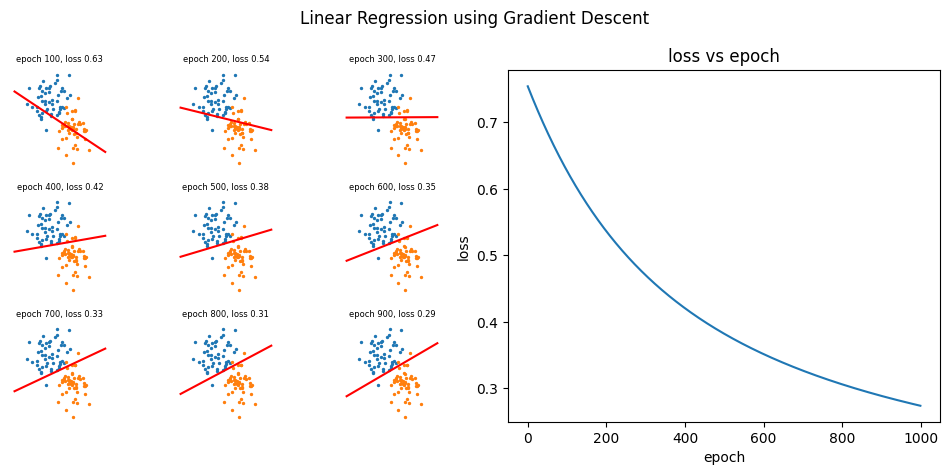

In [9]:
torch.manual_seed(3)
model = Model(2, 1)

# Loss function : Binary Cross Entropy Loss
lossfn = nn.BCELoss()

# Optimizer : Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 1000
losses = []

plot = -1
fig, axes = plt.subplot_mosaic("012xxx;345xxx;678xxx", tight_layout=True, figsize=(9.6, 4.8))
fig.suptitle('Linear Regression using Gradient Descent')

for i in range(epochs):

    y = model.forward(input)
    loss = lossfn(y, output)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % (epochs / 10) == 0 and i > 0:

        plot += 1

        # Get the current weights and bias
        w1, w2, b1 = model.wanb()

        # Create two x inputs
        x = np.array([-2.0, 2.0])

        # Get two y outputs according to the current model's weights and bias
        y = (w1 * x + b1) / -w2

        # Visualize the untrained model prediction on top of the dataset
        axes[f'{plot}'].set_title(f'epoch {i}, loss {loss:0.2f}', fontsize=6)
        axes[f'{plot}'].axis('off')
        axes[f'{plot}'].plot(x, y, 'r')
        axes[f'{plot}'].scatter(xy[label==0, 0], xy[label==0, 1], s=2)
        axes[f'{plot}'].scatter(xy[label==1, 0], xy[label==1, 1], s=2)

axes['x'].set_title('loss vs epoch')
axes['x'].set_xlabel('epoch')
axes['x'].set_ylabel('loss')
axes['x'].plot(range(epochs), losses)

# 7. Testing the model

A is classified as : 0
B is classified as : 0
C is classified as : 1
D is classified as : 1


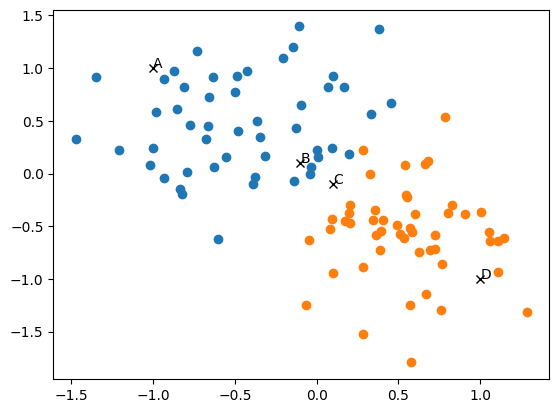

In [33]:
plt.scatter(xy[label==0, 0], xy[label==0, 1])
plt.scatter(xy[label==1, 0], xy[label==1, 1])

point1 = torch.Tensor([-1.0, 1.0])
point2 = torch.Tensor([-0.1, 0.1])
point3 = torch.Tensor([0.1, -0.1])
point4 = torch.Tensor([1.0, -1.0])

plt.plot(*point1.numpy(), 'kx')
plt.plot(*point2.numpy(), 'kx')
plt.plot(*point3.numpy(), 'kx')
plt.plot(*point4.numpy(), 'kx')

plt.annotate('A', point1.numpy())
plt.annotate('B', point2.numpy())
plt.annotate('C', point3.numpy())
plt.annotate('D', point4.numpy())

A = model.predict(point1)
B = model.predict(point2)
C = model.predict(point3)
D = model.predict(point4)

print(f'A is classified as : {A}')
print(f'B is classified as : {B}')
print(f'C is classified as : {C}')
print(f'D is classified as : {D}')